In [8]:
!pip install pandas

  Using cached pandas-2.2.0-cp311-cp311-win_amd64.whl.metadata (19 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 330.3 kB/s eta 0:00:36
   ---------------------------------------- 0.1/11.6 MB 660.6 kB/s eta 0:00:18
    --------------------------------------- 0.2/11.6 MB 2.0 MB/s eta 0:00:06
   --- ------------------------------------ 0.9/11.6 MB 6.0 MB/s eta 0:00:02
   ------- -------------------------------- 2.2/11.6 MB 11.6 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.6 MB 16.6 MB/s eta 0:00:01
   -------------------- ------------------- 6.0/11.6 MB 22.7 MB/s eta 0:00:01
   ------------------------------ --------- 8.9/11.6 MB 27.2 MB/s eta 0:00:01
   ---------------------------------------  11.6/11.6 MB 54.7 MB/s eta 0:00:01
   ---------------------------------------  11.6/11.6 MB 54.7 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 43.7 MB/s eta 0:00:0

In [2]:
# Import the required Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms, models
import torchvision.transforms as transforms
from torchvision.utils import make_grid
#from torchsummary import summary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

C:\Users\bhave\AppData\Local\Temp\ipykernel_16612\710997948.py:12: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:
print(torch.__version__)

2.2.0


In [12]:
print(torchvision.__version__)

0.17.0


In [13]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [15]:
transform = transforms.Compose([ transforms.ToTensor(), # Normalizes to range [0,1]
                        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]), # Also part of normalization
                        transforms.Resize((224, 224), antialias=True),
                        transforms.CenterCrop(224),
                       ])

In [16]:
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [33]:
train_loader =  DataLoader(cifar_trainset, batch_size = 32, shuffle=True,  drop_last=True, num_workers=2)
test_loader = DataLoader(cifar_testset, batch_size= 32,  drop_last=True, num_workers=2)

classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

print(classes)
print(f'Training images available: {len(cifar_trainset)}')
print(f'Testing images available:  {len(cifar_testset)}')

('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
Training images available: 50000
Testing images available:  10000


In [34]:
for images,labels in train_loader:
    break
images.shape

torch.Size([32, 3, 224, 224])

In [35]:
labels

tensor([4, 4, 7, 4, 0, 1, 9, 6, 7, 9, 2, 6, 9, 7, 9, 6, 5, 8, 8, 0, 5, 0, 8, 1,
        6, 8, 4, 0, 4, 3, 4, 2])

Label: [1 1 0 1 1 6 6 2 7 6 5 5 5 7 2 8 5 2 7 2 5 4 3 9 9 9 0 4 7 0 1 0]
Class: Car Car Airplane Car Car Frog Frog Bird Horse Frog Dog Dog Dog Horse Bird Ship Dog Bird Horse Bird Dog Deer Cat Truck Truck Truck Airplane Deer Horse Airplane Car Airplane


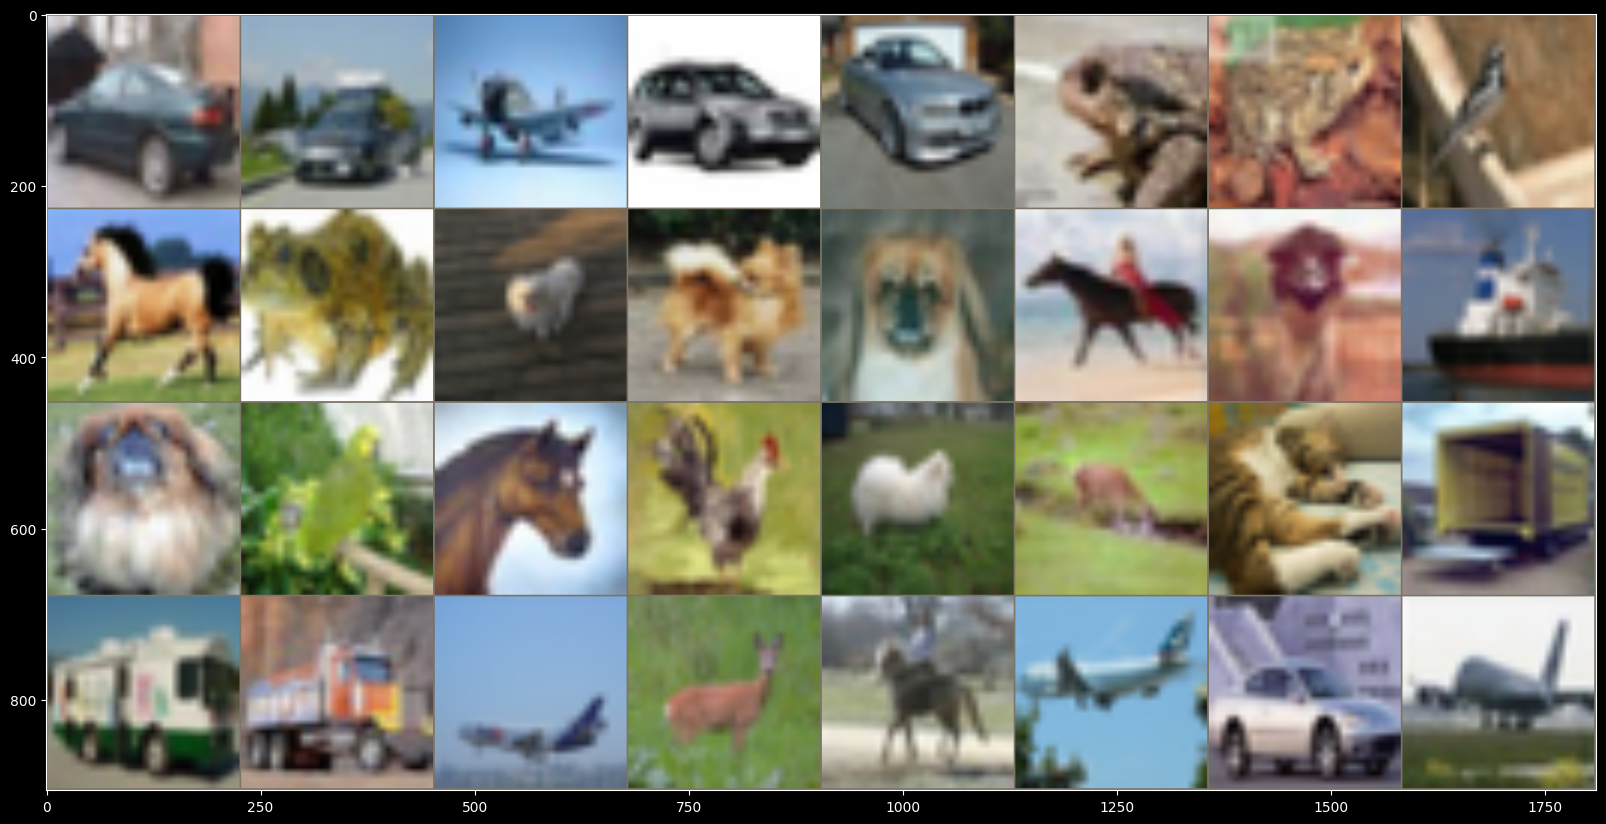

In [21]:
# Print the labels

print('Label:', labels.numpy())
print('Class:', *np.array([classes[i] for i in labels]))

im = make_grid(images, nrow=8)  # 12 images in a row
# Inverse normalize the images

inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

# Print the images

plt.figure(figsize=(20,16))
plt.imshow(np.transpose((im_inv.numpy()*255).astype(np.uint8), (1, 2, 0))); # we see that dataloader has shuffle the images

In [36]:
alexnet_model = models.alexnet(pretrained=True)

In [37]:
alexnet_model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [38]:
# Freeze all layers
for param in alexnet_model.parameters():
    param.requires_grad = False


In [39]:
# Now make later layers trainable
for param in alexnet_model.classifier[1].parameters():
    param.requires_grad = True
for param in alexnet_model.classifier[4].parameters():
    param.requires_grad = True
for param in alexnet_model.classifier[6].parameters():
    param.requires_grad = True

# Replace the fully connected layers
alexnet_model.classifier = nn.Sequential(
    nn.Linear(in_features=9216, out_features=4096, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=4096, out_features=1024, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=1024, out_features=512, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=512, out_features=256, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=256, out_features=128, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=64, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=64, out_features=10, bias=True)
)

alexnet_model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=4096, bias=True)
    (1): ReLU()
    (2): Linear(in_featu

In [13]:
class EarlyStoppingCriterion():
    def __init__(self, patience = 3, delta = 0,  trace_func = print):

        self.patience = patience
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.trace_func = trace_func

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score

        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0

In [41]:
alexnet_model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=4096, bias=True)
    (1): ReLU()
    (2): Linear(in_featu

In [47]:
import time

# epochs
epochs = 50

# loss function
lossfunc = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(alexnet_model.parameters(), momentum=0.9, lr=0.001)

# Instantiating the early stopping
earlystopping = EarlyStoppingCriterion()

# Initialize losses and Accuracies
losses = torch.zeros(epochs)
trainAcc = []
testAcc = []

for epoch in range(epochs):
    start_time = time.time()
    alexnet_model.train()

    # loop over training data batches
    batchAcc = []
    batchLoss = []

    for batch_idx, (X, y) in enumerate(train_loader):
        X = X.to(device)  # Placing features on device
        y = y.to(device)  # Placing labels on device

        ypred = alexnet_model(X)
        loss = lossfunc(ypred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Time
        end_time = time.time()
        time_taken = end_time - start_time

        # Append batch loss
        batchLoss.append(loss.item())

        ypred = ypred.cpu()  # Back to CPU
        y = y.cpu()

        # Compute batch accuracy
        acc = 100 * torch.mean((torch.argmax(ypred, dim=1) == y).float())
        batchAcc.append(acc)

    # Batch loop concluded

    # Average training accuracy (Outside the batch loop)
    train_epoch_accuracy = np.mean(batchAcc)
    trainAcc.append(train_epoch_accuracy)

    # Losses through epochs
    losses[epoch] = np.mean(batchLoss)

    # TESTING the model
    alexnet_model.eval()
    test_batch_acc = []

    with torch.no_grad():  # This step deactivates autograd
        y_pred = []
        y_true = []

        for idx, (X, y) in enumerate(test_loader):
            X = X.to(device)
            y = y.to(device)

            ypred_t = alexnet_model(X)
            
            ypred_t_cpu = ypred_t.cpu().numpy()  # Move to CPU and convert to NumPy
            y_true_cpu = y.cpu().numpy()  # Move labels to CPU and convert to NumPy
            y_pred.append(ypred_t_cpu)
            y_true.append(y_true_cpu)

            tloss = lossfunc(ypred_t, y)
            # Append batch test accuracy
            test_batch_acc.append(100 * torch.mean((torch.argmax(ypred_t, dim=1) == y).float()))

    # Ensure test_batch_acc is on the CPU
    test_batch_acc_cpu = [acc.cpu().numpy() for acc in test_batch_acc]
    # Append the average test accuracy for the epoch
    test_epoch_accuracy = np.mean(test_batch_acc_cpu)
    testAcc.append(test_epoch_accuracy)

    y_pred = np.concatenate(y_pred, axis=0)
    y_true = np.concatenate(y_true, axis=0)

    epoch_len = len(str(epochs))

    print_msg = (f'[{epoch+1:>{epoch_len}}/{epochs:>{epoch_len}}] ' +
                 f'Train Loss: {np.mean(batchLoss):.5f}, Train Accuracy: {train_epoch_accuracy:.2f}%, ' +
                 f'Test Accuracy: {test_epoch_accuracy:.2f}%')
    print(print_msg)

    earlystopping(np.mean(batchLoss), alexnet_model)

    # Optionally break the loop if early stopping criteria met
    if earlystopping.early_stop:
        print("Early stopping")
        break

    end_time = time.time()
    time_taken = end_time - start_time
    print(f'Time taken for Epoch {epoch+1}: {time_taken:.2f} seconds\n')


[ 1/50] Train Loss: 0.24311, Train Accuracy: 91.58%, Test Accuracy: 82.18%
Time taken for Epoch 1: 110.17 seconds

[ 2/50] Train Loss: 0.15553, Train Accuracy: 94.70%, Test Accuracy: 82.76%
Time taken for Epoch 2: 72.99 seconds

[ 3/50] Train Loss: 0.10623, Train Accuracy: 96.40%, Test Accuracy: 83.37%
Time taken for Epoch 3: 71.47 seconds

[ 4/50] Train Loss: 0.07671, Train Accuracy: 97.36%, Test Accuracy: 83.66%
Time taken for Epoch 4: 72.80 seconds

[ 5/50] Train Loss: 0.06286, Train Accuracy: 97.86%, Test Accuracy: 83.53%
Time taken for Epoch 5: 72.17 seconds

[ 6/50] Train Loss: 0.05487, Train Accuracy: 98.12%, Test Accuracy: 84.46%
Time taken for Epoch 6: 76.03 seconds

[ 7/50] Train Loss: 0.03438, Train Accuracy: 98.80%, Test Accuracy: 84.24%
Time taken for Epoch 7: 77.91 seconds

[ 8/50] Train Loss: 0.04412, Train Accuracy: 98.46%, Test Accuracy: 84.89%
EarlyStopping counter: 1 out of 3
Time taken for Epoch 8: 74.89 seconds

[ 9/50] Train Loss: 0.02628, Train Accuracy: 99.13%, 

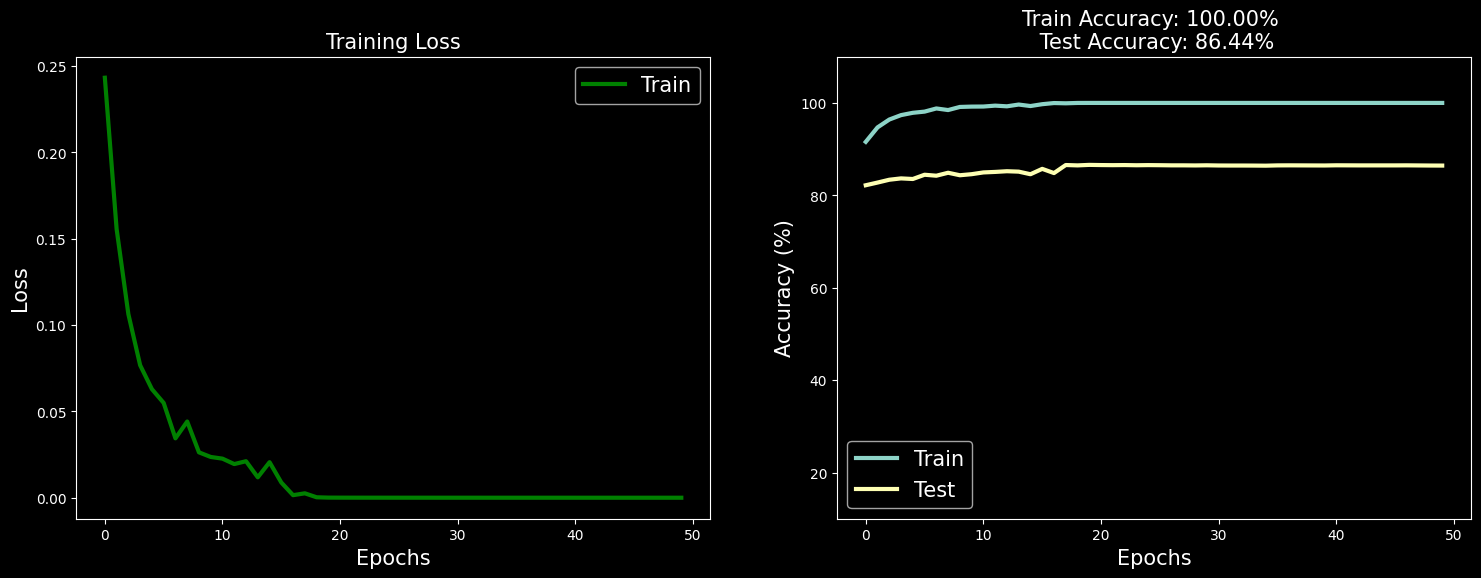

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(losses, 'g', lw=3, label='Train')
ax[0].set_xlabel('Epochs', fontsize=15)
ax[0].set_ylabel('Loss', fontsize=15)
ax[0].legend(fontsize=15)
ax[0].set_title('Training Loss', fontsize=15)

ax[1].plot(trainAcc, label='Train', lw=3)
ax[1].plot(testAcc, label='Test', lw=3)
ax[1].set_xlabel('Epochs', fontsize=15)
ax[1].set_ylabel('Accuracy (%)', fontsize=15)
ax[1].set_ylim([10, 110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize=15)
ax[1].legend(fontsize=15)

plt.show()

In [96]:
#Testing Accuracy on 10000 testing images.

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.2f %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 80.86 %


In [97]:
# Find the accuracy for each class in the dataset.

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet_model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Airplane : 77 %
Accuracy of   Car : 89 %
Accuracy of  Bird : 75 %
Accuracy of   Cat : 82 %
Accuracy of  Deer : 76 %
Accuracy of   Dog : 78 %
Accuracy of  Frog : 86 %
Accuracy of Horse : 81 %
Accuracy of  Ship : 88 %
Accuracy of Truck : 81 %


### Model 2: Try with the different set of HyperParameter and Transform for the Images. - Alexnet_Model_2

In [79]:
transform = transforms.Compose([ transforms.ToTensor(), # Normalizes to range [0,1]
                        transforms.Resize((256), antialias=True),
                        transforms.RandomCrop(230),
                        transforms.RandomHorizontalFlip(),
                        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]) # Also part of normalization
                       ])

In [80]:
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [81]:
train_loader =  DataLoader(cifar_trainset, batch_size = 32, shuffle=True,  drop_last=True, num_workers=2)
test_loader = DataLoader(cifar_testset, batch_size= 32,  drop_last=True, num_workers=2)

classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

print(classes)
print(f'Training images available: {len(cifar_trainset)}')
print(f'Testing images available:  {len(cifar_testset)}')

('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
Training images available: 50000
Testing images available:  10000


In [82]:
for images,labels in train_loader:
    break
images.shape

torch.Size([32, 3, 230, 230])

In [83]:
alexnet_model_2 = models.alexnet(pretrained=True)

c:\Users\bhave\anaconda3\envs\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\bhave\anaconda3\envs\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [84]:
alexnet_model_2

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [85]:
# Freeze all layers
for param in alexnet_model_2.parameters():
    param.requires_grad = False


In [87]:
# Now we make later layers trainable
for param in alexnet_model_2.features.parameters():
    param.requires_grad = True

# Replace the last FC layer with new FC layers
alexnet_model_2.classifier[6] = nn.Sequential(
    nn.Linear(in_features=4096, out_features=2048, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=2048, out_features=512, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(in_features=512, out_features=256, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=256, out_features=64, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=64, out_features=10, bias=True)
)
  

In [88]:
alexnet_model_2

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [89]:
alexnet_model_2.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [90]:
import time

# epochs
epochs = 31
# loss function
lossfunc = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.SGD(alexnet_model_2.parameters(), momentum=0.9, lr=0.0001)
# Instantiating the early stopping
earlystopping = EarlyStoppingCriterion()

In [92]:


# Initialize losses and Accuracies
losses = torch.zeros(epochs)
trainAcc = []
testAcc = []

for epoch in range(epochs):
    start_time = time.time()
    alexnet_model_2.train()

    # loop over training data batches
    batchAcc = []
    batchLoss = []

    for X, y in train_loader:
        X = X.to(device)  # Placing features on device
        y = y.to(device)  # Placing labels on device

        ypred = alexnet_model_2(X)
        loss = lossfunc(ypred, y)

        # Backpropogation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Time
        end_time = time.time()
        time_taken = end_time - start_time

        # Append batch loss
        batchLoss.append(loss.item())

        ypred = ypred.cpu()  # Back to CPU
        y = y.cpu()

        # Compute batch accuracy
        acc = 100 * torch.mean((torch.argmax(ypred, dim=1) == y).float())
        batchAcc.append(acc)

    # Batch loop concluded

    trainAcc.append(np.mean(batchAcc))

    losses[epoch] = np.mean(batchLoss)

    # TESTING the model
    alexnet_model_2.eval()

    X,y = next(iter(test_loader))
    X = X.to(device)
    y = y.to(device)

    with torch.no_grad(): #This step  Deactivating autogradient
        ypred = alexnet_model_2(X)
        ypred = ypred.cpu()
        y = y.cpu()

        # Appending test accuracy

        testAcc.append(100 * torch.mean((torch.argmax(ypred,dim=1)==y).float()))

    epoch_len = len(str(epochs))

    print_msg = (f'[{epoch+1:>{epoch_len}}/{epochs:>{epoch_len}}] ' +
             f'Train Loss: {np.mean(batchLoss):.5f}, Train Accuracy: {trainAcc[-1]:.2f}%, Overall Test Accuracy: {testAcc[-1]:.2f}%')

    print(print_msg)

    earlystopping(np.mean(batchLoss), alexnet_model_2)

    # Optionally break the loop if early stopping criteria met
    if earlystopping.early_stop:
        print("Early stopping")
        break

    end_time = time.time()
    time_taken = end_time - start_time
    print(f'Time taken for Epoch {epoch+1}: {time_taken:.2f} seconds\n')

[ 1/31] Train Loss: 2.14247, Train Accuracy: 20.08%, Overall Test Accuracy: 50.00%
Time taken for Epoch 1: 96.56 seconds

[ 2/31] Train Loss: 1.36173, Train Accuracy: 48.89%, Overall Test Accuracy: 68.75%
Time taken for Epoch 2: 97.04 seconds

[ 3/31] Train Loss: 0.99021, Train Accuracy: 64.76%, Overall Test Accuracy: 84.38%
Time taken for Epoch 3: 97.25 seconds

[ 4/31] Train Loss: 0.81801, Train Accuracy: 71.24%, Overall Test Accuracy: 87.50%
Time taken for Epoch 4: 96.21 seconds

[ 5/31] Train Loss: 0.72866, Train Accuracy: 74.75%, Overall Test Accuracy: 93.75%
Time taken for Epoch 5: 98.43 seconds

[ 6/31] Train Loss: 0.66490, Train Accuracy: 77.10%, Overall Test Accuracy: 96.88%
Time taken for Epoch 6: 95.40 seconds

[ 7/31] Train Loss: 0.61365, Train Accuracy: 78.82%, Overall Test Accuracy: 93.75%
Time taken for Epoch 7: 96.76 seconds

[ 8/31] Train Loss: 0.57682, Train Accuracy: 80.21%, Overall Test Accuracy: 93.75%
Time taken for Epoch 8: 95.71 seconds

[ 9/31] Train Loss: 0.54

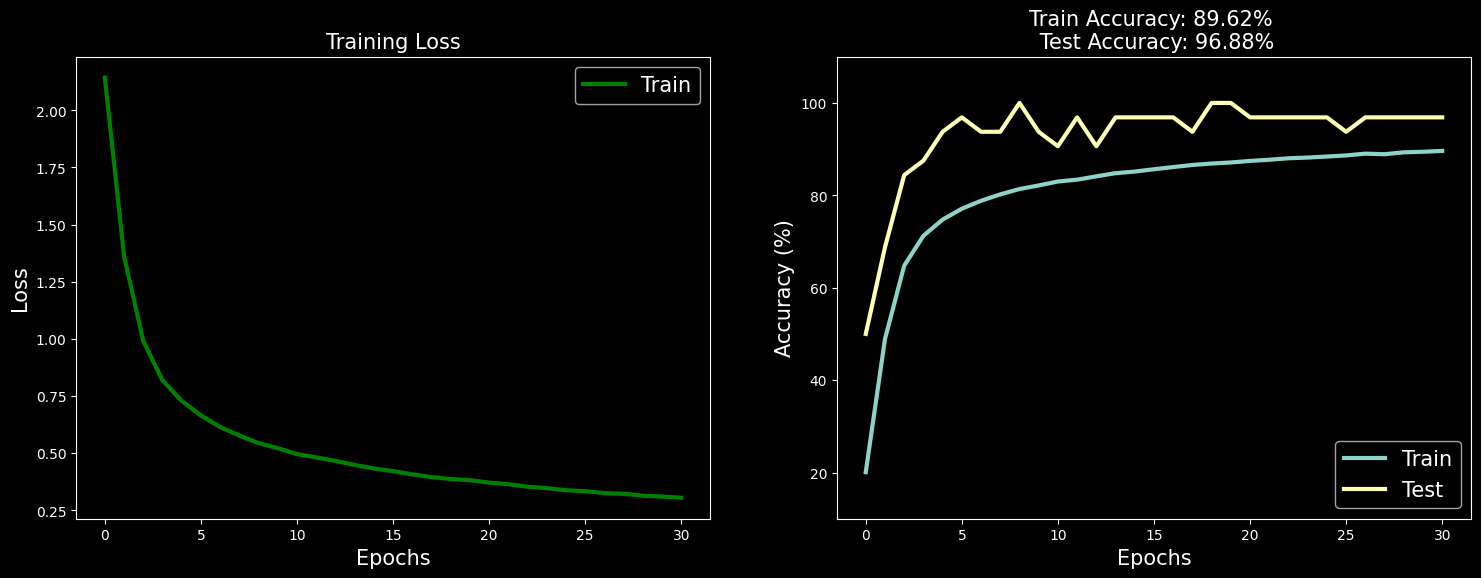

In [93]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(losses, 'g', lw=3, label='Train')
ax[0].set_xlabel('Epochs', fontsize=15)
ax[0].set_ylabel('Loss', fontsize=15)
ax[0].legend(fontsize=15)
ax[0].set_title('Training Loss', fontsize=15)

ax[1].plot(trainAcc, label='Train', lw=3)
ax[1].plot(testAcc, label='Test', lw=3)
ax[1].set_xlabel('Epochs', fontsize=15)
ax[1].set_ylabel('Accuracy (%)', fontsize=15)
ax[1].set_ylim([10, 110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize=15)
ax[1].legend(fontsize=15)

plt.show()

In [94]:
#Testing Accuracy on 10000 testing images.

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet_model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.2f %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 90.01 %


In [95]:
# Find the accuracy for each class in the dataset.

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet_model_2(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Airplane : 84 %
Accuracy of   Car : 97 %
Accuracy of  Bird : 84 %
Accuracy of   Cat : 76 %
Accuracy of  Deer : 88 %
Accuracy of   Dog : 82 %
Accuracy of  Frog : 97 %
Accuracy of Horse : 89 %
Accuracy of  Ship : 95 %
Accuracy of Truck : 95 %


### Model 3: Try with the different set of HyperParameter and Transform for the Images. - Alexnet_Model_3

In [2]:
transform = transforms.Compose([ transforms.ToTensor(), # Normalizes to range [0,1]
                        transforms.Resize((256), antialias=True),
                        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]) # Also part of normalization
                       ])

In [3]:
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [100]:
train_loader =  DataLoader(cifar_trainset, batch_size = 32, shuffle=True,  drop_last=True, num_workers=2)
test_loader = DataLoader(cifar_testset, batch_size= 32,  drop_last=True, num_workers=2)

classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

print(classes)
print(f'Training images available: {len(cifar_trainset)}')
print(f'Testing images available:  {len(cifar_testset)}')

('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
Training images available: 50000
Testing images available:  10000


In [101]:
for images,labels in train_loader:
    break
images.shape

torch.Size([32, 3, 224, 224])

In [111]:
alexnet_model_3 = models.alexnet(pretrained=True)

c:\Users\bhave\anaconda3\envs\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\bhave\anaconda3\envs\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [112]:
alexnet_model_3

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [113]:
# Now we make later layers trainable
for param in alexnet_model_3.features.parameters():
    param.requires_grad = False

# Replace the last FC layer with new FC layers
alexnet_model_3.classifier[6] = nn.Sequential(
    nn.Linear(in_features=4096, out_features=2048, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=2048, out_features=512, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(in_features=512, out_features=256, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=256, out_features=64, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=64, out_features=10, bias=True)
)
  

In [116]:
alexnet_model_3.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [117]:
import time

# epochs
epochs = 61
# loss function
lossfunc = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.SGD(alexnet_model_3.parameters(), momentum=0.9, lr=0.0001)
# Instantiating the early stopping
earlystopping = EarlyStoppingCriterion()

In [118]:


# Initialize losses and Accuracies
losses = torch.zeros(epochs)
trainAcc = []
testAcc = []

for epoch in range(epochs):
    start_time = time.time()
    alexnet_model_3.train()

    # loop over training data batches
    batchAcc = []
    batchLoss = []

    for X, y in train_loader:
        X = X.to(device)  # Placing features on device
        y = y.to(device)  # Placing labels on device

        ypred = alexnet_model_3(X)
        loss = lossfunc(ypred, y)

        # Backpropogation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Time
        end_time = time.time()
        time_taken = end_time - start_time

        # Append batch loss
        batchLoss.append(loss.item())

        ypred = ypred.cpu()  # Back to CPU
        y = y.cpu()

        # Compute batch accuracy
        acc = 100 * torch.mean((torch.argmax(ypred, dim=1) == y).float())
        batchAcc.append(acc)

    # Batch loop concluded

    trainAcc.append(np.mean(batchAcc))

    losses[epoch] = np.mean(batchLoss)

    # TESTING the model
    alexnet_model_3.eval()

    X,y = next(iter(test_loader))
    X = X.to(device)
    y = y.to(device)

    with torch.no_grad(): #This step  Deactivating autogradient
        ypred = alexnet_model_3(X)
        ypred = ypred.cpu()
        y = y.cpu()

        # Appending test accuracy

        testAcc.append(100 * torch.mean((torch.argmax(ypred,dim=1)==y).float()))

    epoch_len = len(str(epochs))

    print_msg = (f'[{epoch+1:>{epoch_len}}/{epochs:>{epoch_len}}] ' +
             f'Train Loss: {np.mean(batchLoss):.5f}, Train Accuracy: {trainAcc[-1]:.2f}%, Overall Test Accuracy: {testAcc[-1]:.2f}%')

    print(print_msg)

    earlystopping(np.mean(batchLoss), alexnet_model_3)

    # Optionally break the loop if early stopping criteria met
    if earlystopping.early_stop:
        print("Early stopping")
        break

    end_time = time.time()
    time_taken = end_time - start_time
    print(f'Time taken for Epoch {epoch+1}: {time_taken:.2f} seconds\n')

[ 1/61] Train Loss: 2.30105, Train Accuracy: 11.81%, Overall Test Accuracy: 25.00%
Time taken for Epoch 1: 79.80 seconds

[ 2/61] Train Loss: 2.28201, Train Accuracy: 18.80%, Overall Test Accuracy: 43.75%
Time taken for Epoch 2: 76.55 seconds

[ 3/61] Train Loss: 2.14828, Train Accuracy: 31.47%, Overall Test Accuracy: 50.00%
Time taken for Epoch 3: 81.95 seconds

[ 4/61] Train Loss: 1.64424, Train Accuracy: 39.36%, Overall Test Accuracy: 56.25%
Time taken for Epoch 4: 80.62 seconds

[ 5/61] Train Loss: 1.28770, Train Accuracy: 51.26%, Overall Test Accuracy: 75.00%
Time taken for Epoch 5: 79.85 seconds

[ 6/61] Train Loss: 1.13211, Train Accuracy: 57.95%, Overall Test Accuracy: 84.38%
Time taken for Epoch 6: 78.74 seconds

[ 7/61] Train Loss: 1.02472, Train Accuracy: 62.87%, Overall Test Accuracy: 78.12%
Time taken for Epoch 7: 78.77 seconds

[ 8/61] Train Loss: 0.94799, Train Accuracy: 65.89%, Overall Test Accuracy: 75.00%
Time taken for Epoch 8: 78.11 seconds

[ 9/61] Train Loss: 0.90

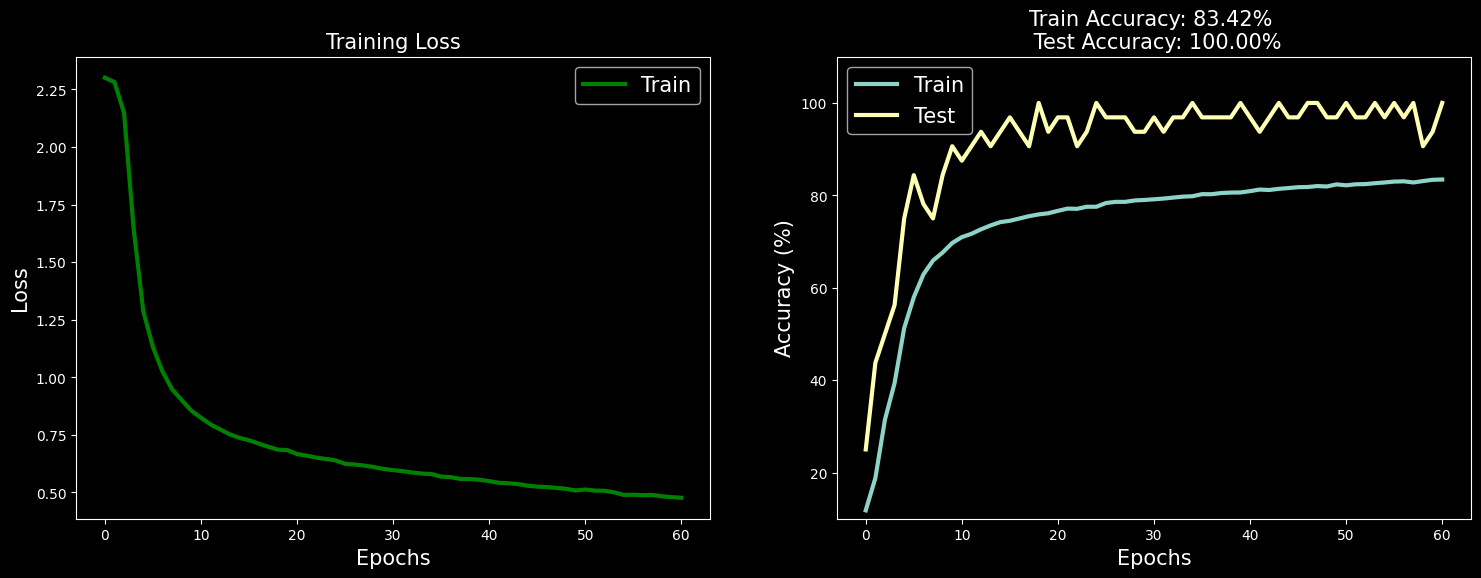

In [119]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(losses, 'g', lw=3, label='Train')
ax[0].set_xlabel('Epochs', fontsize=15)
ax[0].set_ylabel('Loss', fontsize=15)
ax[0].legend(fontsize=15)
ax[0].set_title('Training Loss', fontsize=15)

ax[1].plot(trainAcc, label='Train', lw=3)
ax[1].plot(testAcc, label='Test', lw=3)
ax[1].set_xlabel('Epochs', fontsize=15)
ax[1].set_ylabel('Accuracy (%)', fontsize=15)
ax[1].set_ylim([10, 110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize=15)
ax[1].legend(fontsize=15)

plt.show()

In [120]:
#Testing Accuracy on 10000 testing images.

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet_model_3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.2f %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 85.01 %


In [122]:
# Find the accuracy for each class in the dataset.

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet_model_3(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Airplane : 83 %
Accuracy of   Car : 96 %
Accuracy of  Bird : 76 %
Accuracy of   Cat : 67 %
Accuracy of  Deer : 82 %
Accuracy of   Dog : 75 %
Accuracy of  Frog : 90 %
Accuracy of Horse : 86 %
Accuracy of  Ship : 89 %
Accuracy of Truck : 94 %


### MODEL 4: Alex Net

In [3]:
transform = transforms.Compose([ transforms.ToTensor(), # Normalizes to range [0,1]
                        transforms.Resize((256), antialias=True),
                        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]) # Also part of normalization
                       ])

In [4]:
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar_testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
train_loader =  DataLoader(cifar_trainset, batch_size = 32, shuffle=True,  drop_last=True, num_workers=2)
test_loader = DataLoader(cifar_testset, batch_size= 32,  drop_last=True, num_workers=2)

classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

print(classes)
print(f'Training images available: {len(cifar_trainset)}')
print(f'Testing images available:  {len(cifar_testset)}')

('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
Training images available: 50000
Testing images available:  10000


In [6]:
for images,labels in train_loader:
    break
images.shape

torch.Size([32, 3, 256, 256])

In [7]:
alexnet_model_4 = models.alexnet(pretrained=True)

c:\Users\bhave\anaconda3\envs\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\bhave\anaconda3\envs\pytorch_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
# Now we make later layers trainable
for param in alexnet_model_4.features.parameters():
    param.requires_grad = False

# Replace the last FC layer with new FC layers
alexnet_model_4.classifier[6] = nn.Sequential(
    nn.Linear(in_features=4096, out_features=2048, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(in_features=2048, out_features=512, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(in_features=512, out_features=256, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=256, out_features=128, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=32, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=32, out_features=10, bias=True)
)
  

In [9]:
alexnet_model_4

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [11]:
alexnet_model_4.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [14]:
import time

# epochs
epochs = 51
# loss function
lossfunc = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.Adam(alexnet_model_4.parameters(), lr=0.001)
# Instantiating the early stopping
earlystopping = EarlyStoppingCriterion()

In [16]:


# Initialize losses and Accuracies
losses = torch.zeros(epochs)
trainAcc = []
testAcc = []

for epoch in range(epochs):
    start_time = time.time()
    alexnet_model_4.train()

    # loop over training data batches
    batchAcc = []
    batchLoss = []

    for X, y in train_loader:
        X = X.to(device)  # Placing features on device
        y = y.to(device)  # Placing labels on device

        ypred = alexnet_model_4(X)
        loss = lossfunc(ypred, y)

        # Backpropogation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Time
        end_time = time.time()
        time_taken = end_time - start_time

        # Append batch loss
        batchLoss.append(loss.item())

        ypred = ypred.cpu()  # Back to CPU
        y = y.cpu()

        # Compute batch accuracy
        acc = 100 * torch.mean((torch.argmax(ypred, dim=1) == y).float())
        batchAcc.append(acc)

    # Batch loop concluded

    trainAcc.append(np.mean(batchAcc))

    losses[epoch] = np.mean(batchLoss)

    # TESTING the model
    alexnet_model_4.eval()

    X,y = next(iter(test_loader))
    X = X.to(device)
    y = y.to(device)

    with torch.no_grad(): #This step  Deactivating autogradient
        ypred = alexnet_model_4(X)
        ypred = ypred.cpu()
        y = y.cpu()

        # Appending test accuracy

        testAcc.append(100 * torch.mean((torch.argmax(ypred,dim=1)==y).float()))

    epoch_len = len(str(epochs))

    print_msg = (f'[{epoch+1:>{epoch_len}}/{epochs:>{epoch_len}}] ' +
             f'Train Loss: {np.mean(batchLoss):.5f}, Train Accuracy: {trainAcc[-1]:.2f}%, Overall Test Accuracy: {testAcc[-1]:.2f}%')

    print(print_msg)

    earlystopping(np.mean(batchLoss), alexnet_model_4)

    # Optionally break the loop if early stopping criteria met
    if earlystopping.early_stop:
        print("Early stopping")
        break

    end_time = time.time()
    time_taken = end_time - start_time
    print(f'Time taken for Epoch {epoch+1}: {time_taken:.2f} seconds\n')

[ 1/51] Train Loss: 1.02821, Train Accuracy: 62.37%, Overall Test Accuracy: 87.50%
Time taken for Epoch 1: 157.24 seconds

[ 2/51] Train Loss: 0.73062, Train Accuracy: 77.13%, Overall Test Accuracy: 96.88%
Time taken for Epoch 2: 155.99 seconds

[ 3/51] Train Loss: 0.64271, Train Accuracy: 79.97%, Overall Test Accuracy: 96.88%
Time taken for Epoch 3: 161.15 seconds

[ 4/51] Train Loss: 0.59721, Train Accuracy: 81.71%, Overall Test Accuracy: 96.88%
Time taken for Epoch 4: 171.79 seconds

[ 5/51] Train Loss: 0.55905, Train Accuracy: 82.62%, Overall Test Accuracy: 96.88%
Time taken for Epoch 5: 170.28 seconds

[ 6/51] Train Loss: 0.52561, Train Accuracy: 83.58%, Overall Test Accuracy: 93.75%
Time taken for Epoch 6: 172.32 seconds

[ 7/51] Train Loss: 0.49523, Train Accuracy: 84.71%, Overall Test Accuracy: 96.88%
Time taken for Epoch 7: 168.10 seconds

[ 8/51] Train Loss: 0.47769, Train Accuracy: 85.54%, Overall Test Accuracy: 90.62%
Time taken for Epoch 8: 173.91 seconds

[ 9/51] Train Lo

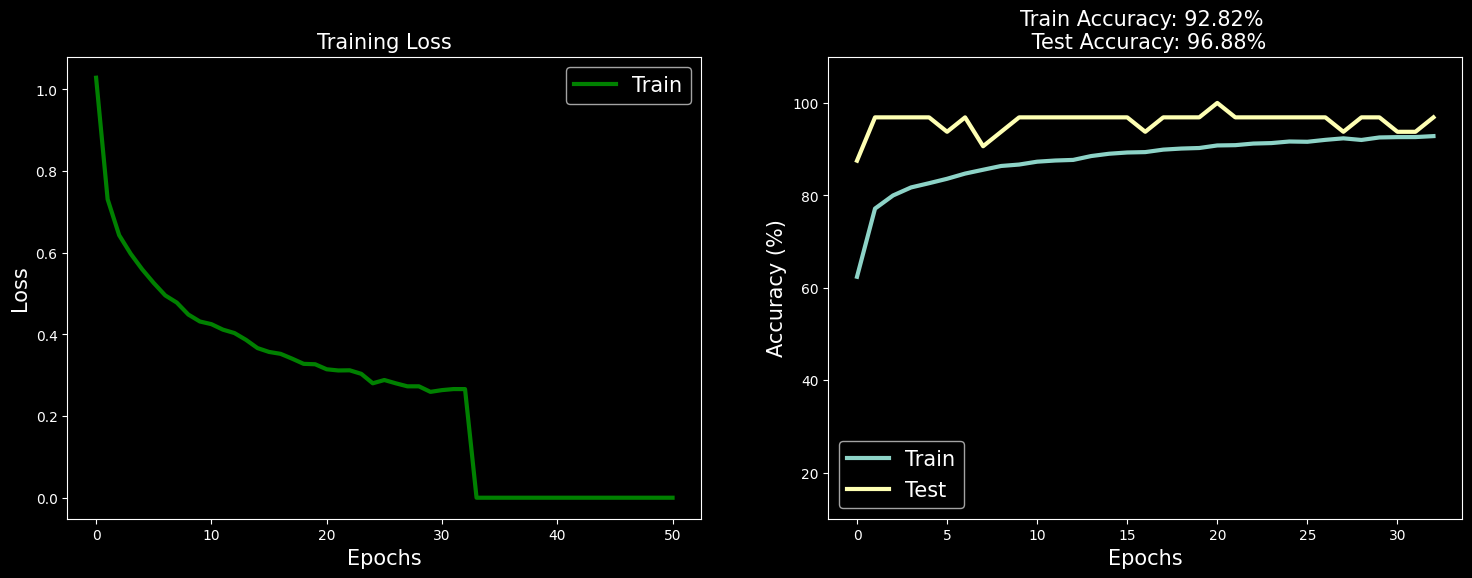

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(losses, 'g', lw=3, label='Train')
ax[0].set_xlabel('Epochs', fontsize=15)
ax[0].set_ylabel('Loss', fontsize=15)
ax[0].legend(fontsize=15)
ax[0].set_title('Training Loss', fontsize=15)

ax[1].plot(trainAcc, label='Train', lw=3)
ax[1].plot(testAcc, label='Test', lw=3)
ax[1].set_xlabel('Epochs', fontsize=15)
ax[1].set_ylabel('Accuracy (%)', fontsize=15)
ax[1].set_ylim([10, 110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize=15)
ax[1].legend(fontsize=15)

plt.show()

In [19]:
#Testing Accuracy on 10000 testing images.

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet_model_4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.2f %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 87.57 %


In [20]:
# Find the accuracy for each class in the dataset.

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet_model_4(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Airplane : 89 %
Accuracy of   Car : 96 %
Accuracy of  Bird : 81 %
Accuracy of   Cat : 77 %
Accuracy of  Deer : 84 %
Accuracy of   Dog : 80 %
Accuracy of  Frog : 89 %
Accuracy of Horse : 92 %
Accuracy of  Ship : 93 %
Accuracy of Truck : 94 %
